In [92]:
import pandas as pd
import numpy as np

In [93]:
## TODO: Fill the dataset filename
credit_df = pd.read_csv( '../data/bank.csv' )

In [94]:
credit_df[0:5]

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,0
1,33,services,married,secondary,no,4789,yes,yes,1,4,0
2,35,management,single,tertiary,no,1350,yes,no,1,1,0
3,30,management,married,tertiary,no,1476,yes,yes,4,0,0
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,0


In [95]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
age                  4521 non-null int64
job                  4521 non-null object
marital              4521 non-null object
education            4521 non-null object
default              4521 non-null object
balance              4521 non-null int64
housing-loan         4521 non-null object
personal-loan        4521 non-null object
current-campaign     4521 non-null int64
previous-campaign    4521 non-null int64
subscribed           4521 non-null int64
dtypes: int64(5), object(6)
memory usage: 388.6+ KB


In [96]:
default = credit_df[credit_df.subscribed == 0]

In [97]:
list( credit_df.columns )

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign',
 'subscribed']

In [98]:
X_features = list( credit_df.columns )
X_features.remove( 'subscribed' )
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [99]:
## TODO : Create dummy features
encoded_credit_df = pd.get_dummies(credit_df[X_features] , drop_first= True)

In [100]:
encoded_credit_df.columns

Index(['age', 'balance', 'current-campaign', 'previous-campaign',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes',
       'housing-loan_yes', 'personal-loan_yes'],
      dtype='object')

In [101]:
Y = credit_df.subscribed
X = encoded_credit_df

In [102]:
from sklearn.model_selection import train_test_split

## TODO: Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3 , random_state = 42)

In [103]:
X_train[0:2]

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
4153,42,440,5,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2085,33,-77,3,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [104]:
import statsmodels.api as sm

sm.add_constant(X_train)[0:2]

,const,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
4153,1.0,42,440,5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2085,1.0,33,-77,3,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [105]:
## TODO: Build the logit model. Add a constant term to X
logit = sm.Logit( y_train,sm.add_constant(X_train) )

In [106]:
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.336375
         Iterations 7


In [107]:
## TODO: Print summary for the model
lg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.066     
Dependent Variable:   subscribed       AIC:              2176.5818 
Date:                 2017-09-15 15:47 BIC:              2322.0121 
No. Observations:     3164             Log-Likelihood:   -1064.3   
Df Model:             23               LL-Null:          -1139.5   
Df Residuals:         3140             LLR p-value:      1.0639e-20
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -1.8193   0.4566 -3.9843 0.0001 -2.7142 -0.9243
age                  0.0099   0.0069  1.4446 0.1486 -0.0035  0.0234
balance             -0.0000   0.0000 -0.6657 0.5056 -0.0001  0.0000
current-campaign    -0.0984   0.0278 -3.5402 0.0004 -0.1529 -0.0439
previous-campaign    0.1319   0.0253  5.2166 0.0000  0.0824  0.1815
job_blue-collar     -0.4232   0.2363 -1.7909 0.0733 -0.8862  0.0399
job_entrepreneur    -1.0109   0.4624 -2.1859 0.0288 -1.9173 -0.1045
job_housemaid        0.0912   0.3743  0.2437 0.8075 -0.6425  0.8249
job_management      -0.1525   0.2377 -0.6416 0.5211 -0.6184  0.3134
job_retired          0.4007   0.2921  1.3721 0.1700 -0.1717  0.9732
job_self-employed   -0.1784   0.3221 -0.5540 0.5796 -0.8097  0.4528
job_services        -0.3478   0.2677 -1.2993 0.1938 -0.8725  0.1768
job_student          0.4505   0.3660  1.2307 0.2184 -0.2669  1.1678
job_technician      -0.3543   0.2235 -1.5849 0.1130 -0.7924  0.0838
job_unemployed      -1.0886   0.5004 -2.1756 0.0296 -2.0694 -0.1079
job_unknown          0.1319   0.5426  0.2432 0.8079 -0.9315  1.1954
marital_married     -0.3178   0.1758 -1.8084 0.0705 -0.6623  0.0266
marital_single      -0.0085   0.2054 -0.0415 0.9669 -0.4112  0.3941
education_secondary  0.2773   0.2020  1.3728 0.1698 -0.1186  0.6733
education_tertiary   0.4790   0.2325  2.0599 0.0394  0.0232  0.9347
education_unknown   -0.2083   0.3535 -0.5891 0.5558 -0.9012  0.4847
default_yes          0.4189   0.4257  0.9841 0.3251 -0.4155  1.2533
housing-loan_yes    -0.5524   0.1229 -4.4946 0.0000 -0.7933 -0.3115
personal-loan_yes   -0.5412   0.1881 -2.8773 0.0040 -0.9099 -0.1725
===================================================================

"""

In [108]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [109]:
## TODO: Get the significant variables
significant_vars = get_significant_vars(lg)
significant_vars

['const',
 'current-campaign',
 'previous-campaign',
 'job_entrepreneur',
 'job_unemployed',
 'education_tertiary',
 'housing-loan_yes',
 'personal-loan_yes']

In [110]:
significant_vars.remove('const')

In [111]:
final_logit = sm.Logit( y_train, sm.add_constant( X_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.341808
         Iterations 7


In [112]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.051     
Dependent Variable:   subscribed       AIC:              2178.9604 
Date:                 2017-09-15 15:47 BIC:              2227.4371 
No. Observations:     3164             Log-Likelihood:   -1081.5   
Df Model:             7                LL-Null:          -1139.5   
Df Residuals:         3156             LLR p-value:      5.1133e-22
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -1.4882   0.1150 -12.9433 0.0000 -1.7135 -1.2628
current-campaign   -0.1041   0.0279  -3.7335 0.0002 -0.1588 -0.0495
previous-campaign   0.1350   0.0250   5.4091 0.0000  0.0861  0.1839
job_entrepreneur   -0.8995   0.4275  -2.1043 0.0354 -1.7373 -0.0617
job_unemployed     -0.9425   0.4724  -1.9951 0.0460 -1.8684 -0.0166
education_tertiary  0.2864   0.1188   2.4105 0.0159  0.0535  0.5194
housing-loan_yes   -0.7099   0.1153  -6.1553 0.0000 -0.9359 -0.4839
personal-loan_yes  -0.5435   0.1854  -2.9323 0.0034 -0.9068 -0.1802
===================================================================

"""

In [113]:
from sklearn import metrics

In [114]:
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test, 
                               "predicted_prob": model.predict( sm.add_constant( X_test[significant_vars] ) ) } )    
    return y_pred_df

In [115]:
## TODO: Get the predicted probabilities 
y_pred_df = get_predictions(y_test, final_logit)

In [116]:
y_pred_sorted_df = y_pred_df.sort_values( 'predicted_prob', ascending = False )

In [117]:
def get_dociles( df ):
    df['docile'] = 1
    idx = 0
    for each_d in range( 0, 10 ):

        df.iloc[idx:idx+num_per_docile, df.columns.get_loc('docile')] = each_d 

        idx += num_per_docile

    df['docile'] = df['docile'] + 1    
    return df

In [118]:
num_per_docile = 136
dociles_predict_df = get_dociles(y_pred_sorted_df)

In [119]:

gain_lift_df = pd.DataFrame( dociles_predict_df.groupby( 'docile')['actual'].sum() ).reset_index()

gain_lift_df.columns = ['docile', 'gain']

gain_lift_df['gain_percentage'] = 100 * gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum()

In [120]:
gain_lift_df

,docile,gain,gain_percentage
0,1,28,18.421053
1,2,22,32.894737
2,3,26,50.000000
3,4,12,57.894737
4,5,15,67.763158
5,6,6,71.710526
6,7,14,80.921053
7,8,11,88.157895
8,9,11,95.394737
9,10,7,100.000000


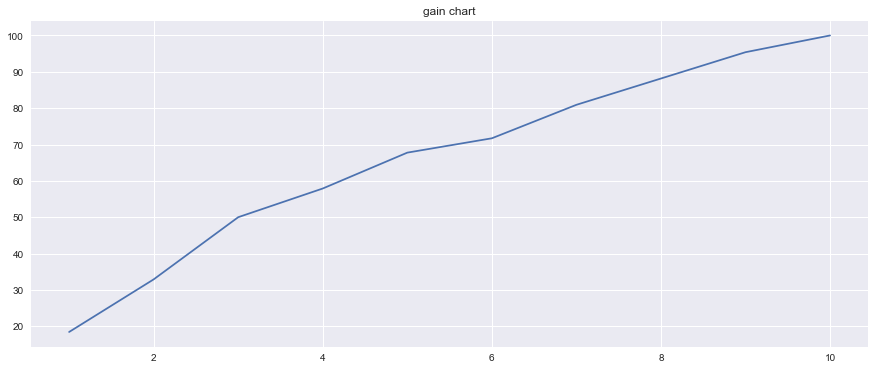

In [127]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

plt.figure(figsize =(15,6))
plt.plot(gain_lift_df['docile'], gain_lift_df['gain_percentage'],'-')
plt.title("gain chart")
plt.show()